In [1]:
# hehehe libraries

import pandas as pd # import the data
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import contextily as ctx

In [5]:
# Step 1: Load the shapefile using geopandas
shapefile_path = 'Datathon 2024/115795-V3/AgChange/AgChange/shapefiles/US_counties_2012_geoid.shp'
counties = gpd.read_file(shapefile_path)

# Step 2: Read the text file into a list
with open('Datathon 2024/115795-V3/AgChange/AgChange/AgCensus_MasterDataFrame.txt', 'r') as f:
    ag1 = f.readlines()

# Step 3: Split the data by tabs and convert to a pandas DataFrame
ag_data = [line.strip().split('\t') for line in ag1]
ag_df = pd.DataFrame(ag_data[1:], columns=ag_data[0])

# Step 4: Match the FIPS code between the shapefile data and ag_df
# Assuming the FIPS code is in the first column of the shapefile and 'FIPS' in the ag_df
fips_col_index = ag_df.columns.str.contains('FIPS').argmax()
counties['FIPS'] = counties.iloc[:, 0]  # Assuming the first column of shapefile contains FIPS codes
merged_data = pd.merge(counties, ag_df, left_on='FIPS', right_on=ag_df.columns[fips_col_index], how='left')

# Step 5: Convert all numeric columns to float (skip FIPS column)
for col in merged_data.columns[1:]:  # Exclude the FIPS column itself
    merged_data[col] = pd.to_numeric(merged_data[col], errors='coerce')

# Step 6: Final Output
print('Ag Census data successfully imported!')
print(f"Number of counties: {len(merged_data)}")
print(f"Number of variables: {merged_data.shape[1]}")

Ag Census data successfully imported!
Number of counties: 3109
Number of variables: 485


In [51]:
counties.head

<bound method NDFrame.head of        FIPS                                           geometry
0     09001  POLYGON ((-73.53134 41.52291, -73.52300 41.623...
1     09011  MULTIPOLYGON (((-71.96497 41.32917, -71.96499 ...
2     10001  POLYGON ((-75.51453 39.36546, -75.51096 39.365...
3     09013  POLYGON ((-72.13582 42.03074, -72.10231 42.029...
4     10003  POLYGON ((-75.59726 39.83786, -75.59547 39.838...
...     ...                                                ...
3104  53073  MULTIPOLYGON (((-123.08946 49.00353, -123.0352...
3105  53075  POLYGON ((-117.82276 47.25983, -117.04181 47.2...
3106  53077  POLYGON ((-121.37398 47.08686, -121.36312 47.0...
3107  53009  MULTIPOLYGON (((-122.92633 48.06668, -122.9466...
3108  11001  POLYGON ((-77.12051 38.93373, -77.08965 38.958...

[3109 rows x 2 columns]>

In [16]:
# Print the columns as a list
print(list(merged_data.columns))

['FIPS', 'geometry', 'Brl1840', 'Bkw1840', 'Crn1840', 'Ctn1840', 'Flx1840', 'Hay1840', 'Oat1840', 'Pnt1840', 'Ptt1840', 'Pls1840', 'Ric1840', 'Rye1840', 'Sgm1840', 'Soy1840', 'Swt1840', 'Sgc1840', 'Tbc1840', 'Wht1840', 'Cat1840', 'Hrs1840', 'Shp1840', 'Swn1840', 'Ckn1840', 'Tky1840', 'Brl1850', 'Bkw1850', 'Crn1850', 'Ctn1850', 'Flx1850', 'Hay1850', 'Oat1850', 'Pnt1850', 'Ptt1850', 'Pls1850', 'Ric1850', 'Rye1850', 'Sgm1850', 'Soy1850', 'Swt1850', 'Sgc1850', 'Tbc1850', 'Wht1850', 'Cat1850', 'Hrs1850', 'Shp1850', 'Swn1850', 'Ckn1850', 'Tky1850', 'Brl1860', 'Bkw1860', 'Crn1860', 'Ctn1860', 'Flx1860', 'Hay1860', 'Oat1860', 'Pnt1860', 'Ptt1860', 'Pls1860', 'Ric1860', 'Rye1860', 'Sgm1860', 'Soy1860', 'Swt1860', 'Sgc1860', 'Tbc1860', 'Wht1860', 'Cat1860', 'Hrs1860', 'Shp1860', 'Swn1860', 'Ckn1860', 'Tky1860', 'Brl1870', 'Bkw1870', 'Crn1870', 'Ctn1870', 'Flx1870', 'Hay1870', 'Oat1870', 'Pnt1870', 'Ptt1870', 'Pls1870', 'Ric1870', 'Rye1870', 'Sgm1870', 'Soy1870', 'Swt1870', 'Sgc1870', 'Tbc1870', 

In [25]:
# List of census years to filter
census_years = [
    1840, 1850, 1860, 1870, 1880, 1890,
    1900, 1910, 1920, 1930, 1940, 1950,
    1959, 1974, 1982, 1992, 2002, 2012,
    2017
]

# Choose a specific census year to filter (e.g., 2012)
selected_year = 2017

# Step 1: Create a list to hold relevant columns for the selected year
year_columns = [col for col in merged_data.columns if str(selected_year) in col]

# Step 2: Create a new DataFrame containing only the relevant columns
# Include 'FIPS' if you want it in the resulting DataFrame
data_2017 = merged_data[['FIPS'] + year_columns]

# Example: Show the filtered DataFrame
print("Filtered data for the year", selected_year)
print(data_2017)


Filtered data for the year 2017
       FIPS   Brl2017  Bkw2017   Crn2017  Ctn2017  Flx2017   Hay2017  Oat2017  \
0     09001  0.000000      0.0  0.000444      0.0      0.0  0.002487      0.0   
1     09011  0.000000      0.0  0.011406      0.0      0.0  0.014927      0.0   
2     10001  0.016927      0.0  0.125444      0.0      0.0  0.007176      0.0   
3     09013  0.000000      0.0  0.013226      0.0      0.0  0.013209      0.0   
4     10003  0.005383      0.0  0.051465      0.0      0.0  0.010798      0.0   
...     ...       ...      ...       ...      ...      ...       ...      ...   
3104  53073  0.000000      0.0  0.006015      0.0      0.0  0.006335      0.0   
3105  53075  0.020478      0.0  0.000342      0.0      0.0  0.009789      0.0   
3106  53077  0.000070      0.0  0.013819      0.0      0.0  0.008489      0.0   
3107  53009  0.000334      0.0  0.000009      0.0      0.0  0.002137      0.0   
3108  11001  0.000000      0.0  0.000000      0.0      0.0  0.000000      0.0

In [27]:
# Choose a specific census year to filter (e.g., 2012)
selected_year = 2012

# Step 1: Create a list to hold relevant columns for the selected year
year_columns = [col for col in merged_data.columns if str(selected_year) in col]

# Step 2: Create a new DataFrame containing only the relevant columns
# Include 'FIPS' if you want it in the resulting DataFrame
data_2012 = merged_data[['FIPS'] + year_columns]

# Example: Show the filtered DataFrame
print("Filtered data for the year", selected_year)
print(data_2012)

Filtered data for the year 2012
       FIPS   Brl2012  Bkw2012   Crn2012  Ctn2012  Flx2012   Hay2012  \
0     09001  0.000000      0.0  0.000000      0.0      0.0  0.003653   
1     09011  0.000000      0.0  0.002945      0.0      0.0  0.023414   
2     10001  0.037012      0.0  0.129001      0.0      0.0  0.016462   
3     09013  0.000000      0.0  0.003179      0.0      0.0  0.028516   
4     10003  0.012882      0.0  0.073210      0.0      0.0  0.013534   
...     ...       ...      ...       ...      ...      ...       ...   
3104  53073  0.000000      0.0  0.000000      0.0      0.0  0.025842   
3105  53075  0.060059      0.0  0.000000      0.0      0.0  0.012919   
3106  53077  0.000097      0.0  0.005187      0.0      0.0  0.013364   
3107  53009  0.000375      0.0  0.000000      0.0      0.0  0.004515   
3108  11001  0.000000      0.0  0.000000      0.0      0.0  0.000000   

       Oat2012  Pnt2012   Ptt2012  ...  Sgc2012  Tbc2012   Wht2012    Cat2012  \
0     0.000000      0.

In [28]:
# Choose a specific census year to filter (e.g., 2012)
selected_year = 2002

# Step 1: Create a list to hold relevant columns for the selected year
year_columns = [col for col in merged_data.columns if str(selected_year) in col]

# Step 2: Create a new DataFrame containing only the relevant columns
# Include 'FIPS' if you want it in the resulting DataFrame
data_2002 = merged_data[['FIPS'] + year_columns]

# Example: Show the filtered DataFrame
print("Filtered data for the year", selected_year)
print(data_2002)

Filtered data for the year 2002
       FIPS       Brl2002       Bkw2002   Crn2002  Ctn2002  Flx2002   Hay2002  \
0     09001  7.028739e-08  0.000000e+00  0.000739      0.0      0.0  0.005449   
1     09011  0.000000e+00  0.000000e+00  0.015366      0.0      0.0  0.025366   
2     10001  3.080817e-02  0.000000e+00  0.139710      0.0      0.0  0.021017   
3     09013  0.000000e+00  0.000000e+00  0.023302      0.0      0.0  0.025498   
4     10003  2.973748e-03  9.520536e-09  0.066414      0.0      0.0  0.018505   
...     ...           ...           ...       ...      ...      ...       ...   
3104  53073  6.936423e-07  0.000000e+00  0.012353      0.0      0.0  0.029993   
3105  53075  8.934674e-02  0.000000e+00  0.000103      0.0      0.0  0.009770   
3106  53077  1.672948e-04  5.590439e-08  0.012731      0.0      0.0  0.019737   
3107  53009  3.016836e-04  0.000000e+00  0.000217      0.0      0.0  0.005653   
3108  11001  6.510678e-07  0.000000e+00  0.000028      0.0      0.0  0.000025

Corn

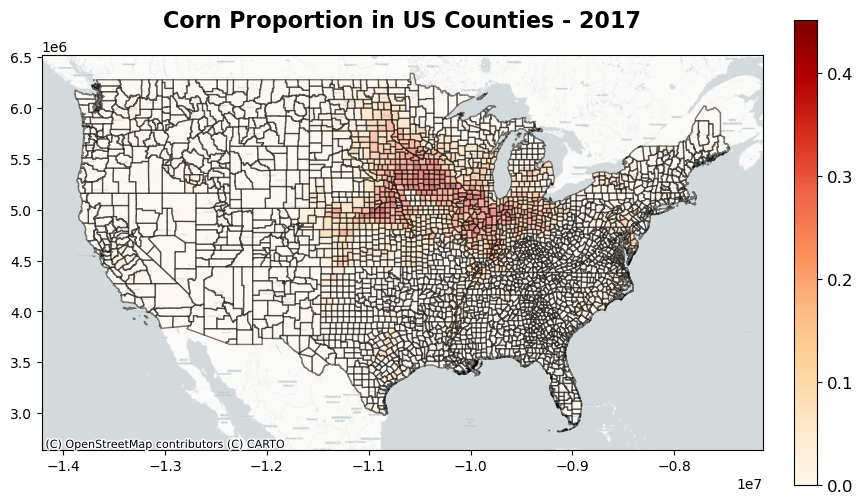

In [81]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx

# Step 1: Merge filtered_data with counties GeoDataFrame on 'FIPS'
merged_counties = counties.merge(data_2017, on='FIPS', how='left')

# Create a color map and norm for the data range
cmap = 'OrRd'
norm = mpl.colors.Normalize(vmin=merged_counties['Crn2017'].min(), vmax=merged_counties['Crn2017'].max())

# Step 2: Plot the merged GeoDataFrame with Corn data
fig, ax = plt.subplots(figsize=(10, 10))
merged_counties.to_crs(epsg=3857).plot(
    column='Crn2017', 
    ax=ax, 
    alpha=0.5, 
    edgecolor='k', 
    legend=False,  # Disable the automatic legend for this first plot
    cmap=cmap
)

# Step 3: Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)

# Step 4: Manually add colorbar for Corn data
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array because we use the range from the norm
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=20)  # Adjust the colorbar length
cbar.ax.tick_params(labelsize=12)  # Adjust colorbar tick size

# Set plot title
plt.title('Corn Proportion in US Counties - 2017', fontsize=16, fontweight='bold', pad=20)

# Step 5: Show the plot
plt.show()

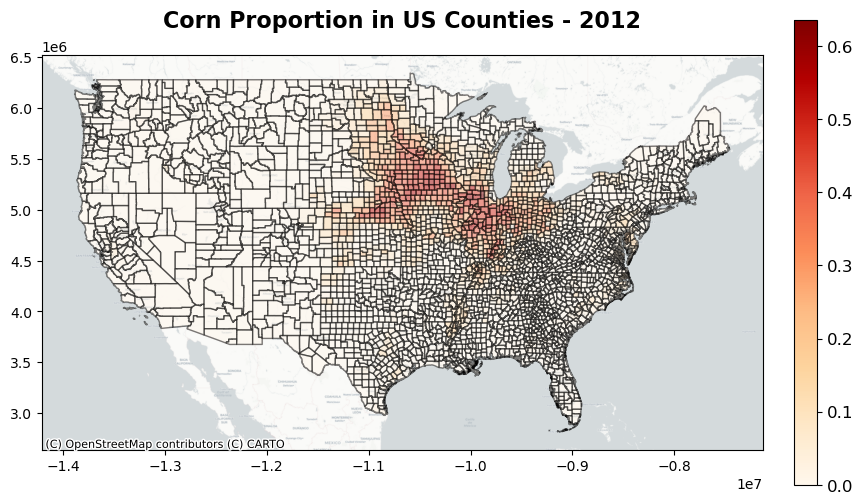

In [80]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx

# Step 1: Merge filtered_data with counties GeoDataFrame on 'FIPS'
merged_counties = counties.merge(data_2012, on='FIPS', how='left')

# Create a color map and norm for the data range
cmap = 'OrRd'
norm = mpl.colors.Normalize(vmin=merged_counties['Crn2012'].min(), vmax=merged_counties['Crn2012'].max())

# Step 2: Plot the merged GeoDataFrame with Corn data
fig, ax = plt.subplots(figsize=(10, 10))
merged_counties.to_crs(epsg=3857).plot(
    column='Crn2012', 
    ax=ax, 
    alpha=0.5, 
    edgecolor='k', 
    legend=False,  # Disable the automatic legend for this first plot
    cmap=cmap
)

# Step 3: Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)

# Step 4: Manually add colorbar for Corn data
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array because we use the range from the norm
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=20)  # Adjust the colorbar length
cbar.ax.tick_params(labelsize=12)  # Adjust colorbar tick size

# Set plot title
plt.title('Corn Proportion in US Counties - 2012', fontsize=16, fontweight='bold', pad=20)

# Step 5: Show the plot
plt.show()

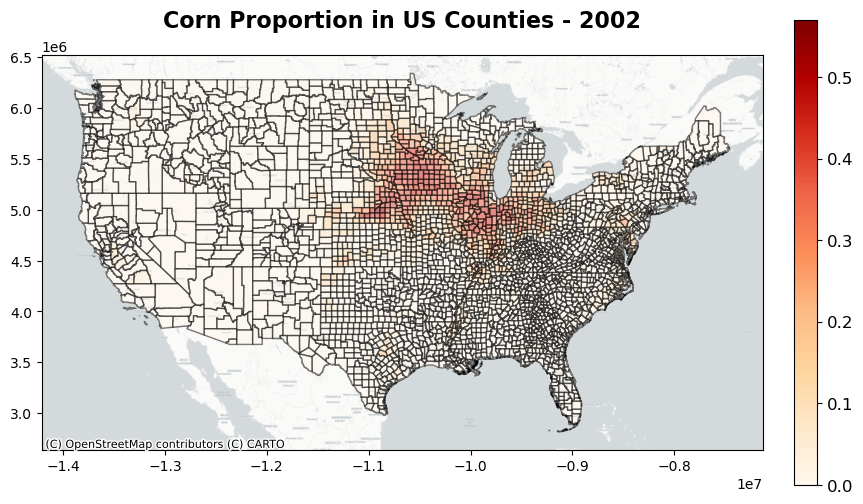

In [79]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import contextily as ctx

# Step 1: Merge filtered_data with counties GeoDataFrame on 'FIPS'
merged_counties = counties.merge(data_2002, on='FIPS', how='left')

# Create a color map and norm for the data range
cmap = 'OrRd'
norm = mpl.colors.Normalize(vmin=merged_counties['Crn2002'].min(), vmax=merged_counties['Crn2002'].max())

# Step 2: Plot the merged GeoDataFrame with Corn data
fig, ax = plt.subplots(figsize=(10, 10))
merged_counties.to_crs(epsg=3857).plot(
    column='Crn2002', 
    ax=ax, 
    alpha=0.5, 
    edgecolor='k', 
    legend=False,  # Disable the automatic legend for this first plot
    cmap=cmap
)

# Step 3: Add basemap
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)

# Step 4: Manually add colorbar for Corn data
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Empty array because we use the range from the norm
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=20)  # Adjust the colorbar length
cbar.ax.tick_params(labelsize=12)  # Adjust colorbar tick size

# Set plot title
plt.title('Corn Proportion in US Counties - 2002', fontsize=16, fontweight='bold', pad=20)

# Step 5: Show the plot
plt.show()

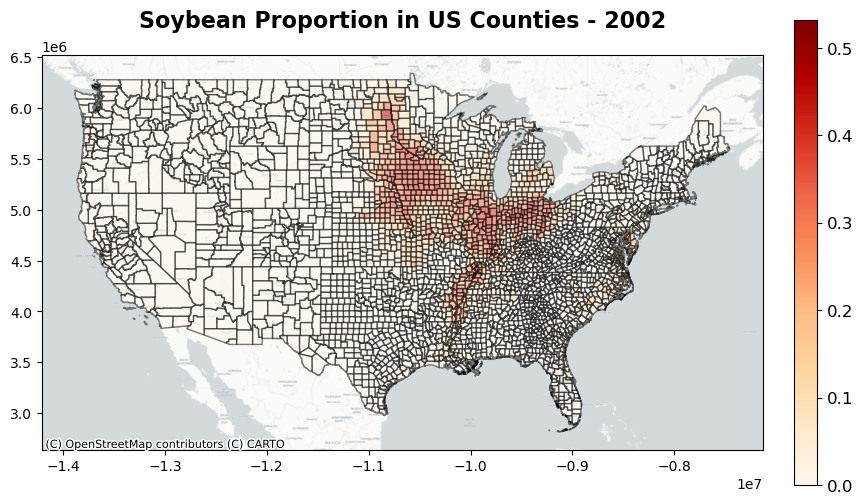

In [46]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import matplotlib as mpl

# Step 1: Merge filtered_data with counties GeoDataFrame on 'FIPS'
merged_counties = counties.merge(data_2002, on='FIPS', how='left')

# Step 2: Reproject if necessary (optional)
merged_counties = merged_counties.to_crs(epsg=3857)  # If needed for web mapping

# Step 3: Plot the GeoDataFrame without the default legend
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Create a color map and norm for the data range
cmap = 'OrRd'
norm = mpl.colors.Normalize(vmin=merged_counties['Soy2002'].min(), vmax=merged_counties['Soy2002'].max())

# Plot the data without the legend
merged_counties.plot(
    column='Soy2002', 
    ax=ax, 
    alpha=0.5, 
    edgecolor='k', 
    legend=False,  # Disable the automatic legend
    cmap=cmap
)

# Step 4: Add basemap (optional)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)

# Step 5: Manually add colorbar with adjusted length
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # We set an empty array because the color map gets the range from the norm
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=20)  # Adjust the colorbar length
cbar.ax.tick_params(labelsize=12)  # Adjust colorbar tick size

plt.title('Soybean Proportion in US Counties - 2002', fontsize=16, fontweight='bold', pad=20)

# Step 6: Show the plot
plt.show()

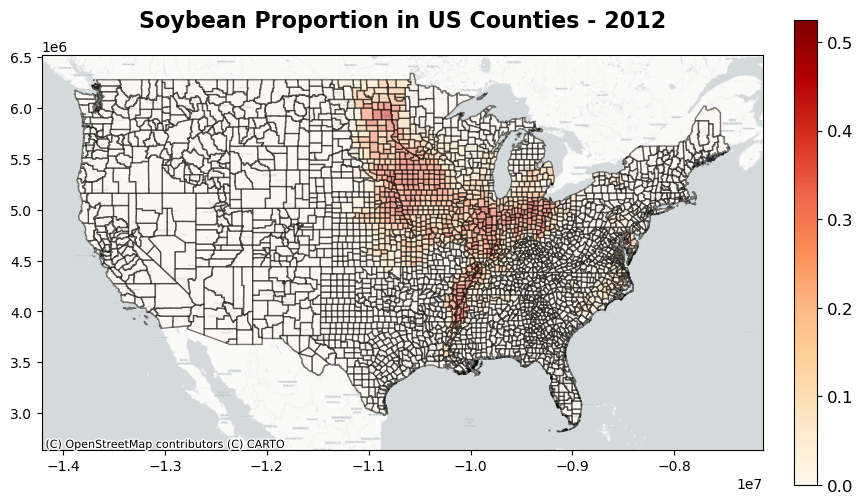

In [47]:
# Step 1: Merge filtered_data with counties GeoDataFrame on 'FIPS'
merged_counties = counties.merge(data_2012, on='FIPS', how='left')

# Step 2: Reproject if necessary (optional)
merged_counties = merged_counties.to_crs(epsg=3857)  # If needed for web mapping

# Step 3: Plot the GeoDataFrame without the default legend
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Create a color map and norm for the data range
cmap = 'OrRd'
norm = mpl.colors.Normalize(vmin=merged_counties['Soy2012'].min(), vmax=merged_counties['Soy2012'].max())

# Plot the data without the legend
merged_counties.plot(
    column='Soy2012', 
    ax=ax, 
    alpha=0.5, 
    edgecolor='k', 
    legend=False,  # Disable the automatic legend
    cmap=cmap
)

# Step 4: Add basemap (optional)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)

# Step 5: Manually add colorbar with adjusted length
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # We set an empty array because the color map gets the range from the norm
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=20)  # Adjust the colorbar length
cbar.ax.tick_params(labelsize=12)  # Adjust colorbar tick size

plt.title('Soybean Proportion in US Counties - 2012', fontsize=16, fontweight='bold', pad=20)

# Step 6: Show the plot
plt.show()

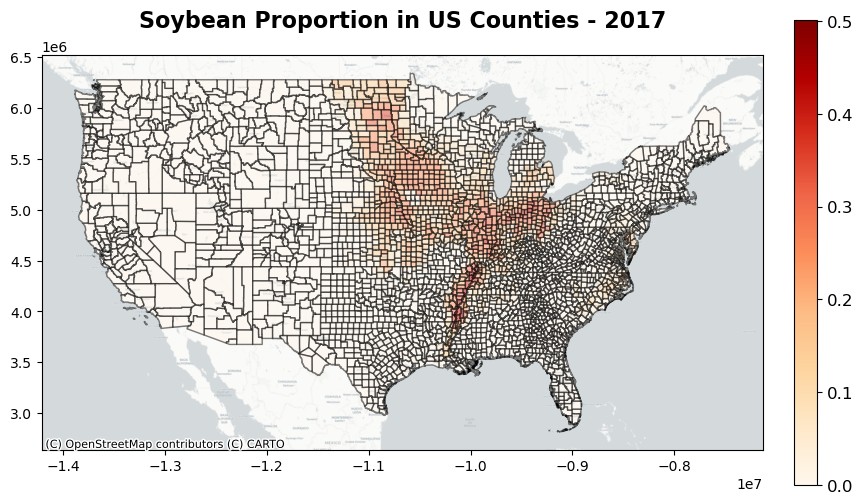

In [48]:
# Step 1: Merge filtered_data with counties GeoDataFrame on 'FIPS'
merged_counties = counties.merge(data_2017, on='FIPS', how='left')

# Step 2: Reproject if necessary (optional)
merged_counties = merged_counties.to_crs(epsg=3857)  # If needed for web mapping

# Step 3: Plot the GeoDataFrame without the default legend
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Create a color map and norm for the data range
cmap = 'OrRd'
norm = mpl.colors.Normalize(vmin=merged_counties['Soy2017'].min(), vmax=merged_counties['Soy2017'].max())

# Plot the data without the legend
merged_counties.plot(
    column='Soy2017', 
    ax=ax, 
    alpha=0.5, 
    edgecolor='k', 
    legend=False,  # Disable the automatic legend
    cmap=cmap
)

# Step 4: Add basemap (optional)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)

# Step 5: Manually add colorbar with adjusted length
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # We set an empty array because the color map gets the range from the norm
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=20)  # Adjust the colorbar length
cbar.ax.tick_params(labelsize=12)  # Adjust colorbar tick size

plt.title('Soybean Proportion in US Counties - 2017', fontsize=16, fontweight='bold', pad=20)

# Step 6: Show the plot
plt.show()

In [52]:
# Create the county to FIPS mapping DataFrame
county_mapping = {
    'Collin': '48085',
    'Dallas': '48061',
    'Tarrant': '48439',
    'Travis': '48453',
    'Jefferson': '48239',
    'Cameron': '48061',
    'Harris': '48201',
    'Johnson': '48239',
    'Brazoria': '48051',
    'Montgomery': '48339',
    'Nueces': '48350',
    'Denton': '48121',
    'Hidalgo': '48179',
    'El Paso': '48061',
    'Galveston': '48067',
    'Hood': '48205',
    'Kaufman': '48251',
    'Webb': '48497',
    'Bexar': '48029',
    'Gregg': '48191',
    'Ellis': '48139',
    'Rockwall': '48397',
    'Smith': '48225',
    'Victoria': '48507',
    'Parker': '48365',
    'Orange': '48355',
    'Brewster': '48053',
    'Harrison': '48201'
}

# Convert the dictionary to a DataFrame
county_fips_df = pd.DataFrame(list(county_mapping.items()), columns=['county', 'fips'])

In [59]:
# Load the ozone data
ozone_data = pd.read_csv('ozone_data.csv')

# Strip any whitespace from the county names in ozone_data
ozone_data['county'] = ozone_data['county'].str.strip()

# Merge the ozone data with the FIPS mapping
merged_data = ozone_data.merge(county_fips_df, on='county', how='left')

# Ensure that the FIPS codes in the counties GeoDataFrame are strings
counties['FIPS'] = counties['FIPS'].astype(str)

# Merge the counties GeoDataFrame with the merged data
final_data = counties.merge(merged_data[['fips', 'arithmetic_mean']], left_on='FIPS', right_on='fips', how='left')

# Filter for Texas counties using the first two digits of the FIPS code
texas_counties = counties[counties['FIPS'].str.startswith('48')]

# Merge the Texas counties GeoDataFrame with the merged ozone data
texas_data = texas_counties.merge(merged_data[['fips', 'arithmetic_mean']], left_on='FIPS', right_on='fips', how='left')


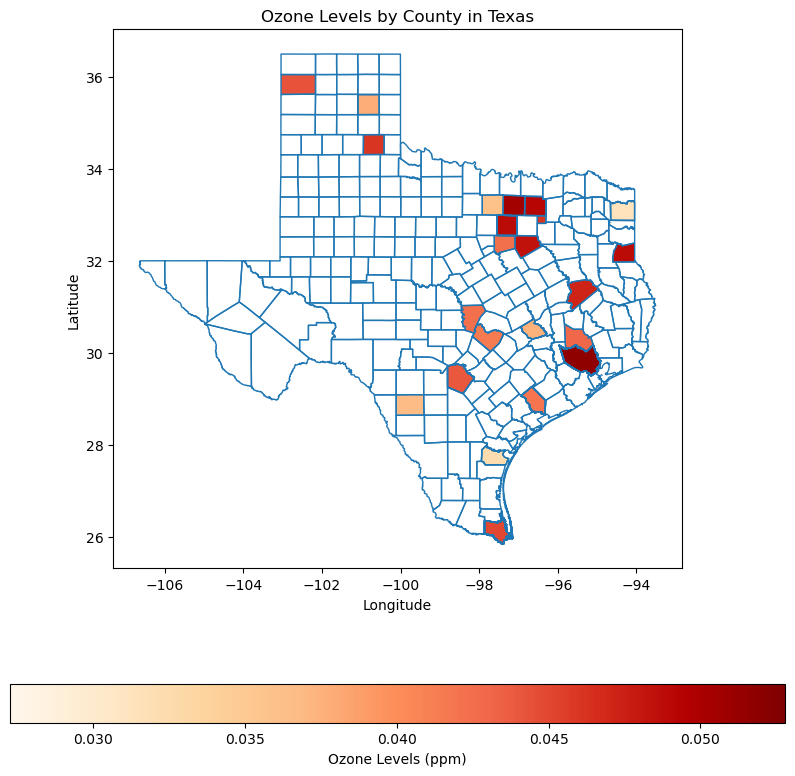

In [60]:
# Plotting the Texas counties with ozone data
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
texas_data.boundary.plot(ax=ax, linewidth=1)  # Plot the county boundaries

# Plot the filled counties with arithmetic mean
texas_data.plot(column='arithmetic_mean', ax=ax, legend=True,
                 legend_kwds={'label': "Ozone Levels (ppm)",
                              'orientation': "horizontal"},
                 cmap='OrRd')  # You can change the colormap as needed

# Title and labels
plt.title('Ozone Levels by County in Texas')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.show()

In [62]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to scrape
url = "https://journeynorth.org/sightings/querylist.html?season=fall&map=monarch-peak-migration&year=2020&submit=View+Data"

# Make a request to fetch the webpage content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table by its ID 'querylist'
    table = soup.find('table', {'id': 'querylist'})
    
    # Initialize lists to hold the table data
    headers = []
    rows_data = []
    
    # Extract table headers
    if table:
        headers = [th.text.strip() for th in table.find_all('th')]
        
        # Extract rows of data
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [col.text.strip() for col in cols]
            if cols:  # Skip empty rows
                rows_data.append(cols)
    else:
        print("Table not found on the page")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Convert to pandas DataFrame
df = pd.DataFrame(rows_data, columns=headers)

# Show the first few rows of the dataframe
print(df.head())

# Save the data to a CSV file if needed
df.to_csv('monarch_migration_2020.csv', index=False)

          Date         Town State/Province Latitude Longitude Number Image
0  1  11/10/20    Monterrey            NLE     25.7    -100.3    200      
1  2  11/09/20     Cape May             NJ     38.9     -74.9     50      
2  3  11/09/20  Gulf Shores             AL     30.2     -87.8     50      
3  4  11/08/20     Cape May             NJ     38.9     -74.9     50      
4  5  11/07/20     Cape May             NJ     38.9     -74.9     38      


In [63]:
# URL of the webpage to scrape
url = "https://journeynorth.org/sightings/querylist.html?season=&map=monarch-peak-migration&year=2017&submit=View+Data"

# Make a request to fetch the webpage content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table by its ID 'querylist'
    table = soup.find('table', {'id': 'querylist'})
    
    # Initialize lists to hold the table data
    headers = []
    rows_data = []
    
    # Extract table headers
    if table:
        headers = [th.text.strip() for th in table.find_all('th')]
        
        # Extract rows of data
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [col.text.strip() for col in cols]
            if cols:  # Skip empty rows
                rows_data.append(cols)
    else:
        print("Table not found on the page")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Convert to pandas DataFrame
df = pd.DataFrame(rows_data, columns=headers)

# Show the first few rows of the dataframe
print(df.head())

# Save the data to a CSV file if needed
df.to_csv('monarch_migration_2017.csv', index=False)

          Date               Town State/Province Latitude Longitude Number  \
0  1  11/26/17         Lake Wales             FL     27.9     -81.6     24   
1  2  11/25/17        Brownsville             TX       26     -97.5     12   
2  3  11/25/17   Saint Petersburg             FL     27.8     -82.6     24   
3  4  11/18/17     Carolina Beach             NC       34     -77.9     20   
4  5  11/16/17  Sullivan's Island             SC     32.8     -79.9     90   

  Image  
0        
1        
2        
3        
4        


In [64]:
# URL of the webpage to scrape
url = "https://journeynorth.org/sightings/querylist.html?season=&map=monarch-peak-migration&year=2012&submit=View+Data"

# Make a request to fetch the webpage content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table by its ID 'querylist'
    table = soup.find('table', {'id': 'querylist'})
    
    # Initialize lists to hold the table data
    headers = []
    rows_data = []
    
    # Extract table headers
    if table:
        headers = [th.text.strip() for th in table.find_all('th')]
        
        # Extract rows of data
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [col.text.strip() for col in cols]
            if cols:  # Skip empty rows
                rows_data.append(cols)
    else:
        print("Table not found on the page")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Convert to pandas DataFrame
df = pd.DataFrame(rows_data, columns=headers)

# Show the first few rows of the dataframe
print(df.head())

# Save the data to a CSV file if needed
df.to_csv('monarch_migration_2012.csv', index=False)

          Date                                 Town State/Province Latitude  \
0  1  11/22/12                               Juarez             NL     25.7   
1  2  11/08/12                  Paradero "Gallitos"            TAM     23.7   
2  3  11/08/12      Cerca de las Cabañas La Florida            TAM     23.7   
3  4  11/08/12        Miqui-Bust Ej. Gabino Vazquez            TAM     23.7   
4  5  11/08/12  cerca del Ejido Altamira Miquihuana            TAM     23.7   

  Longitude Number Image  
0    -100.1     62        
1     -99.1     69        
2     -99.1     19        
3     -99.1      5        
4     -99.1      7        


In [65]:
# URL of the webpage to scrape
url = "https://journeynorth.org/sightings/querylist.html?season=&map=monarch-peak-migration&year=2002&submit=View+Data"

# Make a request to fetch the webpage content
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table by its ID 'querylist'
    table = soup.find('table', {'id': 'querylist'})
    
    # Initialize lists to hold the table data
    headers = []
    rows_data = []
    
    # Extract table headers
    if table:
        headers = [th.text.strip() for th in table.find_all('th')]
        
        # Extract rows of data
        rows = table.find_all('tr')
        for row in rows:
            cols = row.find_all('td')
            cols = [col.text.strip() for col in cols]
            if cols:  # Skip empty rows
                rows_data.append(cols)
    else:
        print("Table not found on the page")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")

# Convert to pandas DataFrame
df = pd.DataFrame(rows_data, columns=headers)

# Show the first few rows of the dataframe
print(df.head())

# Save the data to a CSV file if needed
df.to_csv('monarch_migration_2002.csv', index=False)

          Date         Town State/Province Latitude Longitude Number Image
0  1  10/30/02  Port Lavaca             TX     28.5     -96.7      1      
1  2  10/28/02    Monterrey             NL     25.7    -100.3      1      
2  3  10/28/02    La Madrid            COA     26.8    -101.5      1      
3  4  10/26/02     Saltillo            COA     25.4      -101      1      
4  5  10/26/02     Santiago             NL       25      -100      1      


In [84]:
# Step 1: Load the shapefile using geopandas
shapefile_path = 'C:/Users/cecab/Downloads/Datathon 2024/tl_2012_us_state/tl_2012_us_state.shp'
counties = gpd.read_file(shapefile_path)

counties.columns

counties.head()

,OBJECTID,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area,geometry
0,1,4,9,15,01779782,15,HI,Hawaii,00,G4000,A,1.663425e+10,1.167874e+10,+19.8097670,-155.5061027,2.419034e+06,3.268482e+10,"MULTIPOLYGON (((-17361760.204 2164544.588, -17..."
1,2,3,7,05,00068085,05,AR,Arkansas,00,G4000,A,1.347726e+11,2.959210e+09,+34.8955256,-092.4446262,2.656648e+06,2.053261e+11,"POLYGON ((-10515267.713 4101325.818, -10515269..."
2,3,4,8,35,00897535,35,NM,New Mexico,00,G4000,A,3.141611e+11,7.564385e+08,+34.4346843,-106.1316181,2.900368e+06,4.643927e+11,"POLYGON ((-12138963.727 4106855.170, -12138964..."
3,4,4,8,30,00767982,30,MT,Montana,00,G4000,A,3.769636e+11,3.868565e+09,+47.0511771,-109.6348174,4.607246e+06,8.201836e+11,"POLYGON ((-12727480.235 5886876.586, -12727567..."
4,5,1,2,36,01779796,36,NY,New York,00,G4000,A,1.220579e+11,1.923885e+10,+42.9133974,-075.5962723,3.212630e+06,2.637702e+11,"MULTIPOLYGON (((-8866092.533 5160809.769, -886..."


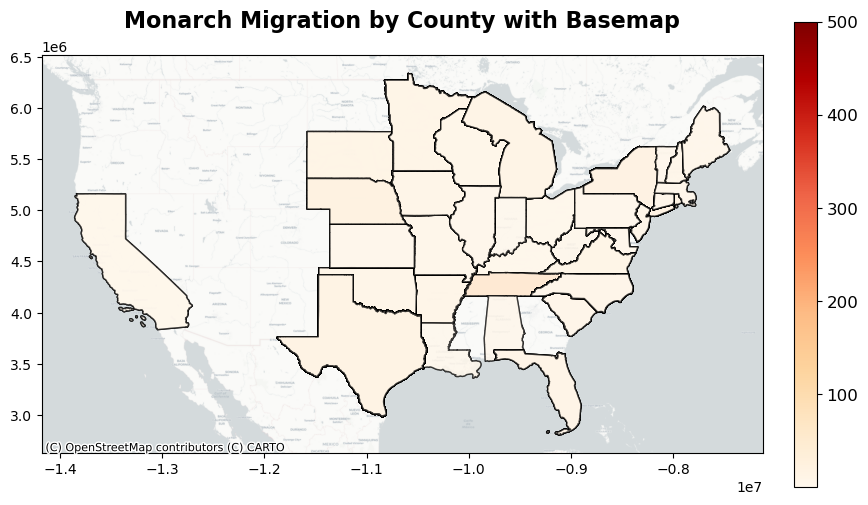

In [105]:
# Load the monarch migration data from the CSV
monarch_data = pd.read_csv('monarch_migration_2017_cleaned.csv')

# Ensure both FIPS columns are strings to allow proper merging
monarch_data['State/Province'] = monarch_data['State/Province'].astype(str)
counties['STUSPS'] = counties['STUSPS'].astype(str)

# Merge the two DataFrames on the State Abbreviation columns
merged_df = counties.merge(monarch_data, left_on='STUSPS', right_on='State/Province')

# Reproject to Web Mercator (EPSG:3857) to use with contextily
merged_df = merged_df.to_crs(epsg=3857)

# Step 3: Plot the GeoDataFrame without the default legend
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Create a color map and norm for the data range
cmap = 'OrRd'
norm = mpl.colors.Normalize(vmin=merged_df['Number'].min(), vmax=merged_df['Number'].max())  # Use the filtered max

# Plot the data without the legend
merged_df.plot(
    column='Number', 
    ax=ax, 
    alpha=0.6, 
    edgecolor='black', 
    legend=False,  # Disable the automatic legend
    cmap=cmap
)

# Step 4: Add basemap (optional)
ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron, zoom=6)

# Step 5: Manually add colorbar with adjusted length
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Set an empty array because the color map gets the range from the norm
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.04, aspect=20)  # Adjust the colorbar length
cbar.ax.tick_params(labelsize=12)  # Adjust colorbar tick size

# Customize the plot with a title and show it
plt.title('Monarch Migration by County with Basemap', fontsize=16, fontweight='bold', pad=20)
plt.show()